In [809]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA


import tensorflow as tf
from sklearn.neural_network import MLPClassifier

In [810]:
# data = pd.read_csv(r'D:\Code\py_code\Multi-Layer-Perceptron\data\BA_AirlineReviews.csv', index_col=0)
# data.rename(columns={'OverallRating': 'Satisfaction'}, inplace=True)
# data.head()

# Loading and Getting a Glimpse of Dataset

In [811]:
data = pd.read_excel(r'D:\Code\py_code\Multi-Layer-Perceptron\data\BA_AirlineReviews_CL_excel.xlsx',header=0)
data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [812]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3701 non-null   int64         
 1   Satisfaction           3701 non-null   object        
 2   ReviewHeader           3701 non-null   object        
 3   Name                   3701 non-null   object        
 4   Datetime               3701 non-null   object        
 5   VerifiedReview         3701 non-null   bool          
 6   ReviewBody             3701 non-null   object        
 7   TypeOfTraveller        2930 non-null   object        
 8   SeatType               3699 non-null   object        
 9   Route                  2926 non-null   object        
 10  DateFlown              2923 non-null   datetime64[ns]
 11  SeatComfort            3585 non-null   float64       
 12  CabinStaffService      3574 non-null   float64       
 13  Gro

# Preprocessing Data

**Checking missing value**

In [813]:
data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

**Replace Missing Value**

1. Missing Value Numerical Data

In [814]:
numeric_missing_col = data.columns[(data.isnull().any()) & (data.dtypes != 'object') & (data.columns != 'DateFlown')].to_list()
numeric_missing_col

['SeatComfort',
 'CabinStaffService',
 'GroundService',
 'ValueForMoney',
 'Food&Beverages',
 'InflightEntertainment',
 'Wifi&Connectivity']

In [815]:
numeric = data[numeric_missing_col].values

impNumeric = SimpleImputer(strategy='constant', fill_value=0)
impNumeric = impNumeric.fit(numeric)
numeric = impNumeric.transform(numeric)
data[numeric_missing_col] = numeric

data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity           0
dtype: int64

2. Missing Value Nominal Data

In [816]:
nominal_missing_col = data.columns[(data.isnull().any()) & (data.dtypes == 'object')].to_list()
nominal_missing_col.append('DateFlown')
nominal_missing_col

['TypeOfTraveller', 'SeatType', 'Route', 'Aircraft', 'DateFlown']

In [817]:
nominal = data[nominal_missing_col].values

impNominal = SimpleImputer(strategy='constant', fill_value='unknown')
impNominal = impNominal.fit(nominal)
nominal = impNominal.transform(nominal)
data[nominal_missing_col] = nominal

data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

**Removing Unwanted Feature**

In [818]:
data.drop(['id','Name','Datetime','DateFlown', 'ReviewHeader', 'ReviewBody', 'Route', 'Aircraft'], inplace=True, axis = 1)
data.head()

,Satisfaction,VerifiedReview,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,Very Dissatisfied,True,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,no,0.0,0.0,0.0
1,Neutral,True,Business,Economy Class,2.0,3.0,1.0,2.0,no,1.0,2.0,2.0
2,Enthusiastic,False,Couple Leisure,Business Class,3.0,3.0,4.0,3.0,yes,4.0,0.0,0.0
3,Very Dissatisfied,True,Couple Leisure,Economy Class,3.0,3.0,1.0,1.0,no,0.0,0.0,0.0
4,Very Dissatisfied,False,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,no,1.0,1.0,1.0


**Features & Label Encoding**

1. Categorical Features Encoding

In [819]:
encoder = OneHotEncoder(sparse_output=False)

categorical_col = ['TypeOfTraveller', 'SeatType']
for col in categorical_col:
    encoded_data = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop([col], axis=1)

data.head()

,Satisfaction,VerifiedReview,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Wifi&Connectivity,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_unknown
0,Very Dissatisfied,True,1.0,1.0,1.0,1.0,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Neutral,True,2.0,3.0,1.0,2.0,no,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Enthusiastic,False,3.0,3.0,4.0,3.0,yes,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Very Dissatisfied,True,3.0,3.0,1.0,1.0,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Very Dissatisfied,False,1.0,1.0,1.0,1.0,no,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


2. Binary Features Encoding

In [820]:
lbenc = LabelEncoder()

for i in data.columns.values:
    if (data[i].dtypes == "object" or data[i].dtypes == "bool") and i != "Satisfaction":
        data[i] = lbenc.fit_transform(data[i].astype(str))

data.head()

,Satisfaction,VerifiedReview,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Wifi&Connectivity,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_unknown
0,Very Dissatisfied,1,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Neutral,1,2.0,3.0,1.0,2.0,0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Enthusiastic,0,3.0,3.0,4.0,3.0,1,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Very Dissatisfied,1,3.0,3.0,1.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Very Dissatisfied,0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


3. Label Encoding

In [821]:
satisfaction_order = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral",
    "Satisfied",
    "Very Satisfied",
    "Enthusiastic",
    "Extremely Satisfied",
    "Delighted",
    "Evangelist",
    "Advocate",
]

ordinal_enc = OrdinalEncoder(categories=[satisfaction_order])
data["Satisfaction"] = ordinal_enc.fit_transform(data[["Satisfaction"]])

data.head()

,Satisfaction,VerifiedReview,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Wifi&Connectivity,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_unknown
0,0.0,1,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,1,2.0,3.0,1.0,2.0,0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.0,0,3.0,3.0,4.0,3.0,1,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1,3.0,3.0,1.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [822]:
# Assuming 'data' is the DataFrame containing the columns
# data = data[['Recommended'] + [col for col in data.columns if col != 'Recommended']]

**Splitting the Data**

In [823]:
features = data.values[:, 1:]
label = data['Satisfaction']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42, stratify=label)

a = pd.DataFrame(y_train)
percentage_values = a['Satisfaction'].value_counts(normalize=True)
print(percentage_values)

b = pd.DataFrame(y_test)
percentage_valuesb = b['Satisfaction'].value_counts(normalize=True)
print(percentage_valuesb)

Satisfaction
0.0    0.234122
1.0    0.115203
2.0    0.110135
5.0    0.100000
8.0    0.089189
6.0    0.084459
9.0    0.083784
3.0    0.068581
4.0    0.063176
7.0    0.051351
Name: proportion, dtype: float64
Satisfaction
0.0    0.234818
1.0    0.114710
2.0    0.109312
5.0    0.099865
8.0    0.089069
6.0    0.085020
9.0    0.083671
3.0    0.068826
4.0    0.063428
7.0    0.051282
Name: proportion, dtype: float64


In [824]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

**Features Scaling**

In [825]:
scaler = StandardScaler()
scaler.fit(features)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [826]:
col = data.columns.to_list()
col.remove('Satisfaction')

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [827]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Assuming data is a DataFrame with features in columns 1 and onwards, and labels in the first column
# features = data.iloc[:, 1:].values
# label = data.iloc[:, 0].values

# # Split the data into training and testing sets with stratification
# x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=42)

# class_1_ratio = 0.7
# class_2_ratio = 0.3

# num_class_1_instances = int(len(y_train) * class_1_ratio)
# num_class_2_instances = int(len(y_train) * class_2_ratio)
# num_class_1_instances_test = int(len(y_test) * class_1_ratio)
# num_class_2_instances_test = int(len(y_test) * class_2_ratio)

# # Convert y_train to a pandas Series to use iloc
# y_train_series = pd.Series(y_train)
# y_test_series = pd.Series(y_test)

# # Extract indices of class 1 and class 2 instances
# class_1_indices = y_train_series[y_train_series.isin([0, 1])].index
# class_2_indices = y_train_series[~y_train_series.isin([0, 1])].index
# class_1_indices_test = y_test_series[y_test_series.isin([0, 1])].index
# class_2_indices_test = y_test_series[~y_test_series.isin([0, 1])].index

# # Sample instances based on the calculated number of instances for each class
# selected_class_1_indices = class_1_indices[:num_class_1_instances]
# selected_class_2_indices = class_2_indices[:num_class_2_instances]
# selected_class_1_indices_test = class_1_indices_test[:num_class_1_instances_test]
# selected_class_2_indices_test = class_2_indices_test[:num_class_2_instances_test]

# # Combine indices of selected instances for both classes
# selected_indices = selected_class_1_indices.union(selected_class_2_indices)
# selected_indices_test = selected_class_1_indices_test.union(selected_class_2_indices_test)

# # Use the selected indices to create the final training set
# X_train_final = x_train[selected_indices]
# y_train_final = y_train[selected_indices]
# X_test_final = x_test[selected_indices_test]
# y_test_final = y_test[selected_indices_test]

# X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

# Feature Selection

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,-0.092938,-0.084280,0.172778,-0.101674,-0.076870,-0.115659,-0.116979,0.181774,0.067656,0.041910,0.080753,0.160706,-0.341877,0.021085,0.020812,-0.044582,-0.033038,-0.012414
1,-0.092938,1.000000,0.651001,0.311105,0.699832,0.646875,0.621362,0.399741,0.076815,-0.135194,-0.043921,-0.024540,0.044735,0.144244,0.034584,-0.117409,0.158492,0.020329,-0.022923
2,-0.084280,0.651001,1.000000,0.312168,0.661721,0.651551,0.700416,0.348393,0.081573,-0.134426,-0.018664,-0.006188,0.017346,0.130753,0.112797,-0.135117,0.113205,-0.040826,0.010148
3,0.172778,0.311105,0.312168,1.000000,0.326264,0.313914,0.241274,0.068812,0.159361,0.046140,0.226840,0.101366,0.248067,-0.634845,0.001148,-0.005703,0.007371,0.002802,-0.012362
4,-0.101674,0.699832,0.661721,0.326264,1.000000,0.796857,0.687629,0.379086,0.019217,-0.178179,-0.051210,-0.033217,0.041223,0.202312,0.042122,-0.061967,0.066721,-0.013474,-0.021080
5,-0.076870,0.646875,0.651551,0.313914,0.796857,1.000000,0.669915,0.332877,0.025373,-0.169663,-0.047823,-0.015790,0.046121,0.172106,0.080508,-0.092679,0.044602,-0.005448,-0.015180
6,-0.115659,0.621362,0.700416,0.241274,0.687629,0.669915,1.000000,0.481705,0.103638,-0.151572,-0.033546,-0.051729,0.003275,0.212983,0.168951,-0.222002,0.125876,0.007384,0.006857
7,-0.116979,0.399741,0.348393,0.068812,0.379086,0.332877,0.481705,1.000000,0.182269,-0.123191,-0.055617,0.000252,-0.051158,0.229162,0.040798,-0.181138,0.160698,0.115546,0.001913
8,0.181774,0.076815,0.081573,0.159361,0.019217,0.025373,0.103638,0.182269,1.000000,0.072635,0.021431,0.103165,0.008693,-0.179186,0.042349,-0.060994,-0.005605,0.038281,0.035540
9,0.067656,-0.135194,-0.134426,0.046140,-0.178179,-0.169663,-0.151572,-0.123191,0.072635,1.000000,-0.274153,-0.155909,-0.255304,-0.227521,0.121853,-0.095567,-0.009019,-0.024610,-0.008218


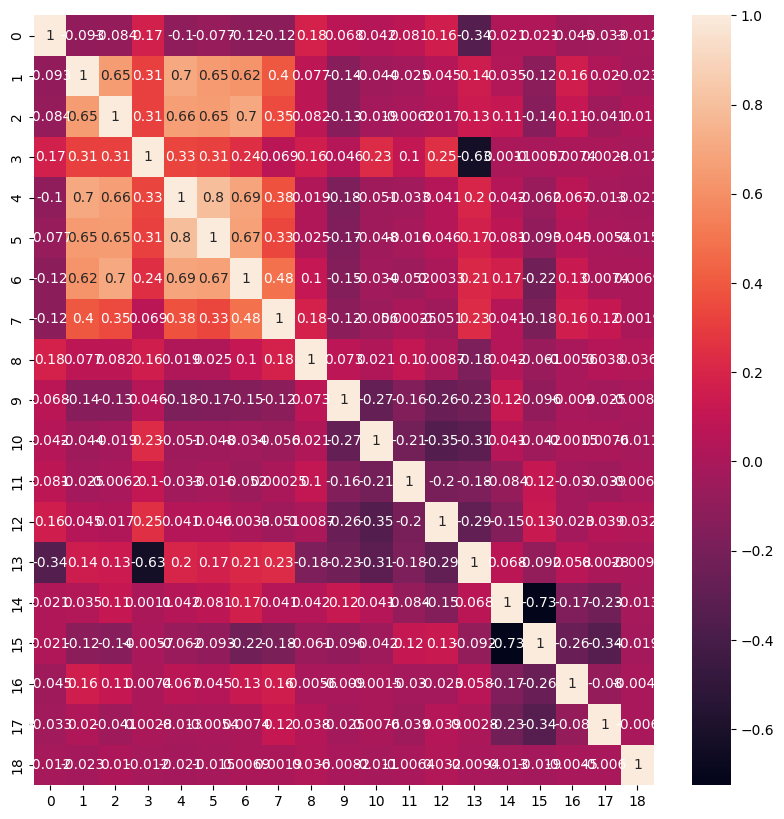

In [828]:
correlation_matrix = pd.DataFrame(x_train).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True ,ax=ax)
correlation_matrix

In [829]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)


x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)

[5, 6]


In [830]:
pca = PCA(n_components=0.95)
pca.fit(x_train)
PCA_X_train = pca.transform(x_train)
PCA_X_test = pca.transform(x_test)

# Model TF

In [831]:
# Input data shape
input_shape = PCA_X_train.shape[1]

# Build the model
model = tf.keras.models.Sequential()

# Input layer
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)))

# Hidden layers
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(PCA_X_train, y_train, epochs=100, batch_size=10, validation_data=(PCA_X_test, y_test))

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 128)               1792      
                                                                 
 dense_129 (Dense)           (None, 256)               33024     
                                                                 
 dense_130 (Dense)           (None, 128)               32896     
                                                                 
 dense_131 (Dense)           (None, 10)                1290      
                                                                 
Total params: 69002 (269.54 KB)
Trainable params: 69002 (269.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
296/296 [==============================] - 1s 2ms/step - loss: 1.6534 - accuracy: 0.3473 - val_loss: 1.4860 - val_accuracy: 0.4035
Epoch 2/100
296/296 [==============================] - 0s 1ms/step - loss: 1.5168 - accuracy: 0.3922 - val_loss: 1.5170 - val_accuracy: 0.3738
Epoch 3/100
296/296 [==============================] - 0s 1ms/step - loss: 1.4955 - accuracy: 0.4020 - val_loss: 1.4513 - val_accuracy: 0.4440
Epoch 4/100
296/296 [==============================] - 0s 1ms/step - loss: 1.4722 - accuracy: 0.4037 - val_loss: 1.4809 - val_accuracy: 0.4332
Epoch 5/100
296/296 [==============================] - 0s 1ms/step - loss: 1.4570 - accuracy: 0.4203 - val_loss: 1.4643 - val_accuracy: 0.4008
Epoch 6/100
296/296 [==============================] - 0s 1ms/step - loss: 1.4523 - accuracy: 0.4230 - val_loss: 1.4362 - val_accuracy: 0.3954
Epoch 7/100
296/296 [==============================] - 0s 1ms/step - loss: 1.4458 - accuracy: 0.4291 - val_loss: 1.4408 - val_accuracy: 0.4386

In [832]:
model.evaluate(PCA_X_test, y_test)

 1/24 [>.............................] - ETA: 0s - loss: 1.2709 - accuracy: 0.5000

24/24 [==============================] - 0s 1ms/step - loss: 1.6429 - accuracy: 0.4386


[1.6429409980773926, 0.4385964870452881]